In [19]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from scipy.stats import linregress

# Import the datetime module from the datetime library.
from datetime import datetime

# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval")
print("------------------------")

# Create counters
record_count = 1
set_count = 1

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

Beginning Data Retrieval
------------------------


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
#print(coordinates)
len(coordinates)

1500

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [5]:
# Loop through all the cities in our list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except KeyError:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | scottsbluff
Processing Record 3 of Set 1 | narsaq
Processing Record 4 of Set 1 | kalmunai
Processing Record 5 of Set 1 | ossora
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | chagda
City not found. Skipping...
Processing Record 8 of Set 1 | jining
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | saldanha
Processing Record 12 of Set 1 | bathsheba
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | hirara
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | bilibino
Processing Record 22 of Set 1 | avarua
Processing Record 23 of Set 1 | yeppoon
Processing Record 24 of Se

Processing Record 39 of Set 4 | port alfred
Processing Record 40 of Set 4 | iqaluit
Processing Record 41 of Set 4 | talara
Processing Record 42 of Set 4 | kang
Processing Record 43 of Set 4 | saint anthony
Processing Record 44 of Set 4 | kolomna
Processing Record 45 of Set 4 | beringovskiy
Processing Record 46 of Set 4 | beisfjord
Processing Record 47 of Set 4 | stromness
Processing Record 48 of Set 4 | alofi
Processing Record 49 of Set 4 | lompoc
Processing Record 50 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 1 of Set 5 | tuktoyaktuk
Processing Record 2 of Set 5 | dingle
Processing Record 3 of Set 5 | grimari
City not found. Skipping...
Processing Record 4 of Set 5 | doha
Processing Record 5 of Set 5 | ruatoria
City not found. Skipping...
Processing Record 6 of Set 5 | kavieng
Processing Record 7 of Set 5 | skibbereen
Processing Record 8 of Set 5 | mar del plata
Processing Record 9 of Set 5 | kasongo-lunda
Processing Record 10 of Set 5 | klaksvik
Processing Reco

Processing Record 30 of Set 8 | ponta delgada
Processing Record 31 of Set 8 | san jose
Processing Record 32 of Set 8 | kupang
Processing Record 33 of Set 8 | cooma
Processing Record 34 of Set 8 | pulandian
Processing Record 35 of Set 8 | broome
Processing Record 36 of Set 8 | leshukonskoye
Processing Record 37 of Set 8 | haibowan
City not found. Skipping...
Processing Record 38 of Set 8 | springbok
Processing Record 39 of Set 8 | quartucciu
Processing Record 40 of Set 8 | amguri
Processing Record 41 of Set 8 | labytnangi
Processing Record 42 of Set 8 | romny
Processing Record 43 of Set 8 | yerbogachen
Processing Record 44 of Set 8 | salalah
Processing Record 45 of Set 8 | bhawanipatna
Processing Record 46 of Set 8 | pouembout
Processing Record 47 of Set 8 | cap malheureux
Processing Record 48 of Set 8 | esso
Processing Record 49 of Set 8 | adela
Processing Record 50 of Set 8 | carbonia
Processing Record 1 of Set 9 | bubaque
Processing Record 2 of Set 9 | baturaja
Processing Record 3 of

Processing Record 15 of Set 12 | ihosy
Processing Record 16 of Set 12 | ibra
Processing Record 17 of Set 12 | ewa beach
Processing Record 18 of Set 12 | bougouni
Processing Record 19 of Set 12 | panchagarh
Processing Record 20 of Set 12 | huangchuan
Processing Record 21 of Set 12 | viransehir
Processing Record 22 of Set 12 | ashland
Processing Record 23 of Set 12 | yanchukan
City not found. Skipping...
Processing Record 24 of Set 12 | hazorasp
Processing Record 25 of Set 12 | breves
Processing Record 26 of Set 12 | raudeberg
Processing Record 27 of Set 12 | ola
Processing Record 28 of Set 12 | chara
Processing Record 29 of Set 12 | lasa
Processing Record 30 of Set 12 | port augusta
Processing Record 31 of Set 12 | yumen
Processing Record 32 of Set 12 | gao
Processing Record 33 of Set 12 | pak phanang
Processing Record 34 of Set 12 | montrose
Processing Record 35 of Set 12 | deer lake
Processing Record 36 of Set 12 | melilla
Processing Record 37 of Set 12 | petropavlovsk-kamchatskiy
Pro

In [6]:
len(city_data)

560

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

In [8]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-10-27 23:12:45,-23.12,-134.97,75.43,83,100,16.69
1,Scottsbluff,US,2020-10-27 23:16:21,41.87,-103.67,34.00,87,1,5.82
2,Narsaq,GL,2020-10-27 23:17:30,60.92,-46.05,32.00,97,100,2.24
3,Kalmunai,LK,2020-10-27 23:17:30,7.42,81.82,78.64,82,53,7.02
4,Ossora,RU,2020-10-27 23:17:30,59.24,163.07,34.20,85,79,6.98
5,Cape Town,ZA,2020-10-27 23:17:05,-33.93,18.42,64.00,82,75,6.93
6,Jining,CN,2020-10-27 23:17:31,35.41,116.58,57.99,1,96,4.83
7,Bethel,US,2020-10-27 23:17:31,41.37,-73.41,53.60,54,90,5.82
8,Albany,US,2020-10-27 23:14:40,42.60,-73.97,48.99,67,100,2.10
9,Saldanha,ZA,2020-10-27 23:17:31,-33.01,17.94,59.00,87,100,2.24


In [9]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
# Import the time module
import time
# Get today's date in seconds
today = time.strftime("%x")
today

'10/27/20'

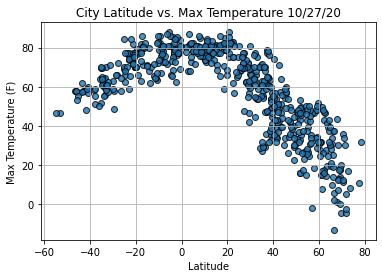

In [12]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/fig1.png")

#Show plot
plt.show()

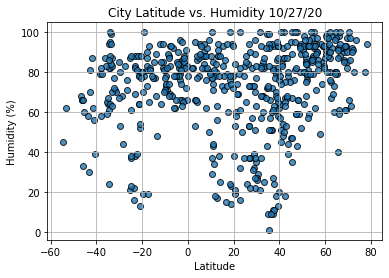

In [13]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/fig2.png")

#Show plot
plt.show()

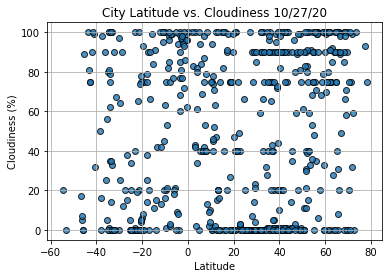

In [14]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/fig3.png")

#Show plot
plt.show()

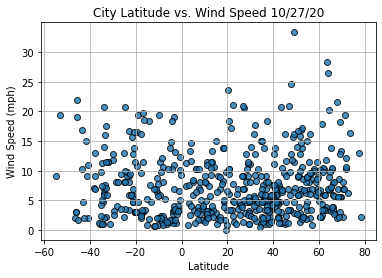

In [15]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/fig4.png")

#Show plot
plt.show()

In [29]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y_values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()

In [30]:
# Create northen and southern hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Scottsbluff,US,2020-10-27 23:16:21,41.87,-103.67,34.00,87,1,5.82
2,Narsaq,GL,2020-10-27 23:17:30,60.92,-46.05,32.00,97,100,2.24
3,Kalmunai,LK,2020-10-27 23:17:30,7.42,81.82,78.64,82,53,7.02
4,Ossora,RU,2020-10-27 23:17:30,59.24,163.07,34.20,85,79,6.98
6,Jining,CN,2020-10-27 23:17:31,35.41,116.58,57.99,1,96,4.83


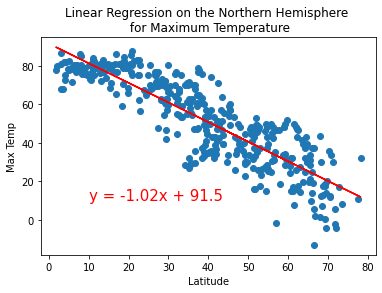

In [49]:
# Linear regression on the northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (10,10))

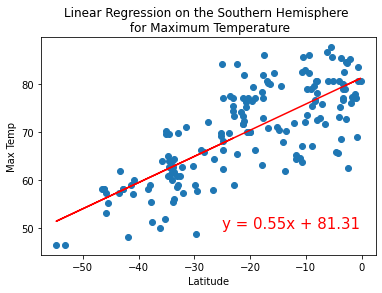

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-25,50))


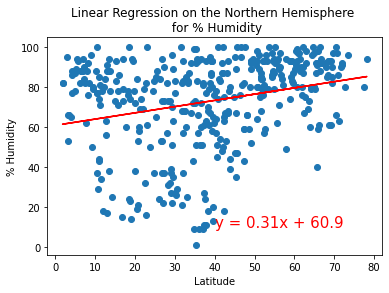

In [50]:
# Linear regression on the Northern Hemisphere Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

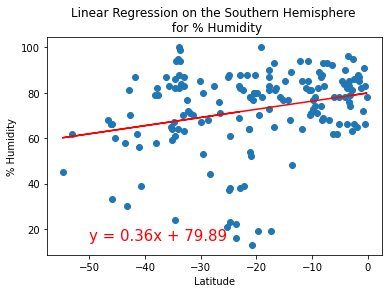

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

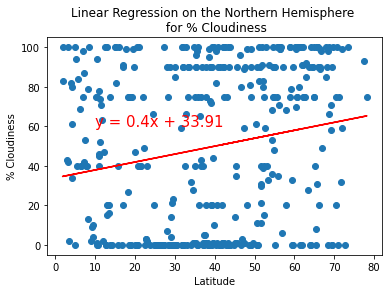

In [54]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,60))

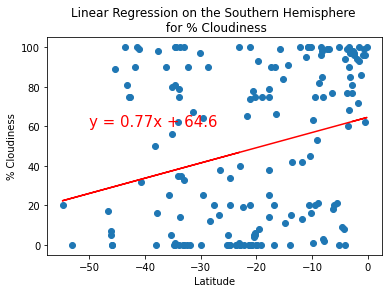

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

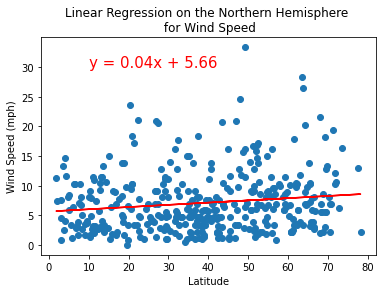

In [58]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(10,30))

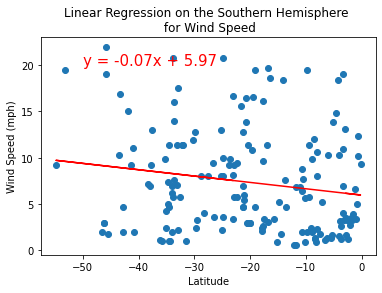

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(-50,20))